In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
df = pd.read_csv('./indian_food.csv')
df.head()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [45]:
df.describe()

,prep_time,cook_time
count,255.000000,255.000000
mean,31.105882,34.529412
std,72.554409,48.265650
min,-1.000000,-1.000000
25%,10.000000,20.000000
50%,10.000000,30.000000
75%,20.000000,40.000000
max,500.000000,720.000000


In [46]:
df.isna().sum()

name              0
ingredients       0
diet              0
prep_time         0
cook_time         0
flavor_profile    0
course            0
state             0
region            1
dtype: int64

In [47]:
df.loc[df['region'].isna(),'region'] = 'North'

In [48]:
df.loc[df['state']== '-1']

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
7,Kaju katli,"Cashews, ghee, cardamom, sugar",vegetarian,10,20,sweet,dessert,-1,-1
9,Kheer,"Milk, rice, sugar, dried fruits",vegetarian,10,40,sweet,dessert,-1,-1
10,Laddu,"Gram flour, ghee, sugar",vegetarian,10,40,sweet,dessert,-1,-1
12,Nankhatai,"Refined flour, besan, ghee, powdered sugar, yo...",vegetarian,20,30,sweet,dessert,-1,-1
94,Khichdi,"Moong dal, green peas, ginger, tomato, green c...",vegetarian,40,20,spicy,main course,-1,-1
96,Kulfi falooda,"Rose syrup, falooda sev, mixed nuts, saffron, ...",vegetarian,45,25,sweet,dessert,-1,-1
98,Lauki ki subji,"Bottle gourd, coconut oil, garam masala, ginge...",vegetarian,10,20,spicy,main course,-1,-1
109,Pani puri,"Kala chana, mashed potato, boondi, sev, lemon",vegetarian,15,2,spicy,snack,-1,-1
111,Papad,"Urad dal, sev, lemon juice, chopped tomatoes",vegetarian,5,5,spicy,snack,-1,-1
115,Rajma chaval,"Red kidney beans, garam masala powder, ginger,...",vegetarian,15,90,spicy,main course,-1,North


In [49]:
x = df.groupby('state')['ingredients'].apply(list).reset_index(name='ingredients')

In [50]:
# function to get the uniqueue values from each string
def get_unique_ingred(ingred):
    for i in ingred:
        word = i.lower().split(',')
    return set(word)

In [51]:
x['ingredients'] = x['ingredients'].apply(get_unique_ingred)
x

,state,ingredients
0,-1,"{ watercress, butter, red onion, red pepper,..."
1,Andhra Pradesh,"{ rice flour, green moong beans}"
2,Assam,"{glutinous rice, black sesame seeds, gur}"
3,Bihar,"{ filling, sattu, dough, atta, mustard oil}"
4,Chhattisgarh,"{chana dal, garam masala powder, arhar dal, ..."
5,Goa,"{ fennel seeds, ginger powder, grated coconu..."
6,Gujarat,"{ sugar, peas, baking soda, grated coconut,..."
7,Haryana,"{ gram flour, besan, curry leaves, garam mas..."
8,Jammu & Kashmir,"{ badam, dried rose petals, cottage cheese, ..."
9,Karnataka,"{ black sesame seeds, curry leaves, thin rice..."


In [52]:
x.drop(0,inplace=True)

In [53]:
x

,state,ingredients
1,Andhra Pradesh,"{ rice flour, green moong beans}"
2,Assam,"{glutinous rice, black sesame seeds, gur}"
3,Bihar,"{ filling, sattu, dough, atta, mustard oil}"
4,Chhattisgarh,"{chana dal, garam masala powder, arhar dal, ..."
5,Goa,"{ fennel seeds, ginger powder, grated coconu..."
6,Gujarat,"{ sugar, peas, baking soda, grated coconut,..."
7,Haryana,"{ gram flour, besan, curry leaves, garam mas..."
8,Jammu & Kashmir,"{ badam, dried rose petals, cottage cheese, ..."
9,Karnataka,"{ black sesame seeds, curry leaves, thin rice..."
10,Kerala,"{ masala, sesame oil, whole red beans, tama..."


In [54]:
x['ingredients'] = x['ingredients'].apply(' '.join)
x

,state,ingredients
1,Andhra Pradesh,rice flour green moong beans
2,Assam,glutinous rice black sesame seeds gur
3,Bihar,filling sattu dough atta mustard oil
4,Chhattisgarh,chana dal garam masala powder arhar dal whi...
5,Goa,fennel seeds ginger powder grated coconut ...
6,Gujarat,sugar peas baking soda grated coconut ridg...
7,Haryana,gram flour besan curry leaves garam masala ...
8,Jammu & Kashmir,badam dried rose petals cottage cheese pist...
9,Karnataka,black sesame seeds curry leaves thin rice fl...
10,Kerala,masala sesame oil whole red beans tamarind...


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [56]:
tfidf = TfidfVectorizer()

# Fit and transform text column to get TF-IDF matrix
vec = tfidf.fit_transform(x['ingredients'])

# Convert sparse matrix to dense matrix and create DataFrame
df_tfidf = pd.DataFrame(vec.todense(), columns=tfidf.get_feature_names_out())

# Print results
print(df_tfidf)

         all   almonds       and     arhar  arrowroot      atta     axone  \
0   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
1   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
2   0.000000  0.000000  0.000000  0.000000   0.000000  0.420872  0.000000   
3   0.000000  0.000000  0.000000  0.251635   0.000000  0.000000  0.000000   
4   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
5   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
6   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
7   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
8   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
9   0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   
10  0.377578  0.000000  0.000000  0.000000   0.377578  0.000000  0.000000   
11  0.000000  0.000000  0.000000  0.000000   0.000000  0.000000  0.000000   

In [57]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,25):
    km = KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(vec)
    wcss.append(km.inertia_)

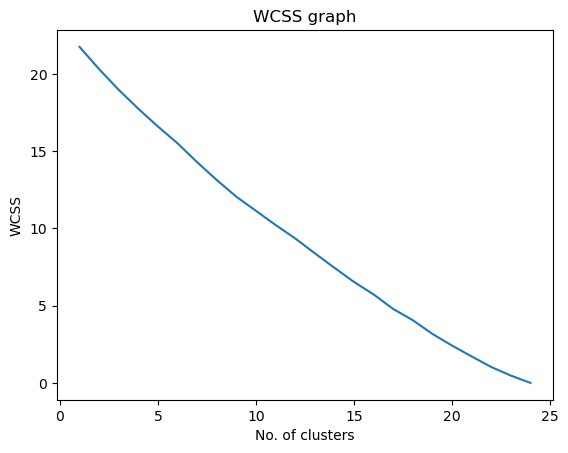

In [58]:
plt.plot(range(1,25),wcss)
plt.xlabel('No. of clusters')
plt.ylabel('WCSS')
plt.title('WCSS graph')
plt.show()

In [59]:
no_cluster = 10

kmeans = KMeans(n_clusters=no_cluster,init='k-means++', random_state=36)
y_pred = kmeans.fit_predict(vec)

In [60]:
x['cluster'] = y_pred
x

,state,ingredients,cluster
1,Andhra Pradesh,rice flour green moong beans,9
2,Assam,glutinous rice black sesame seeds gur,8
3,Bihar,filling sattu dough atta mustard oil,1
4,Chhattisgarh,chana dal garam masala powder arhar dal whi...,0
5,Goa,fennel seeds ginger powder grated coconut ...,4
6,Gujarat,sugar peas baking soda grated coconut ridg...,3
7,Haryana,gram flour besan curry leaves garam masala ...,0
8,Jammu & Kashmir,badam dried rose petals cottage cheese pist...,5
9,Karnataka,black sesame seeds curry leaves thin rice fl...,8
10,Kerala,masala sesame oil whole red beans tamarind...,1


In [61]:
import geopandas as gpd

In [62]:
out_res = pd.concat([x['state'],x['cluster']], axis=1)
out_res.replace('NCT of Delhi','Delhi',inplace=True)

In [63]:
indian_map = gpd.read_file('./India-State-and-Country-Shapefile-Updated-Jan-2020-master/India_State_Boundary.shp')

indian_map.replace('Jammu and Kashmir','Jammu & Kashmir',inplace=True)
indian_map.replace('Telengana','Telangana',inplace=True)
indian_map.replace('Tamilnadu','Tamil Nadu',inplace=True)
indian_map.replace('Chhattishgarh','Chhattisgarh',inplace=True)

In [64]:
merged = indian_map.set_index('State_Name').join(out_res.set_index('state'))
merged

,geometry,cluster
Andaman & Nicobar,"MULTIPOLYGON (((10341718.474 1449533.161, 1034...",NaN
Andhra Pradesh,"POLYGON ((9426056.496 2174632.352, 9426228.484...",9.0
Arunachal Pradesh,"POLYGON ((10696175.277 3434232.650, 10696981.8...",NaN
Assam,"POLYGON ((10380499.251 2872443.723, 10380499.2...",8.0
Bihar,"POLYGON ((9362949.333 3188807.607, 9362966.106...",1.0
Chandigarh,"POLYGON ((8546255.616 3606050.813, 8546315.400...",NaN
Chhattisgarh,"POLYGON ((9275926.808 2765881.317, 9276185.437...",0.0
Daman and Diu and Dadra and Nagar Haveli,"MULTIPOLYGON (((8122247.822 2312434.407, 81223...",NaN
Delhi,"POLYGON ((8583390.570 3359116.190, 8583476.212...",0.0
Goa,"POLYGON ((8223217.424 1779394.764, 8223279.301...",4.0


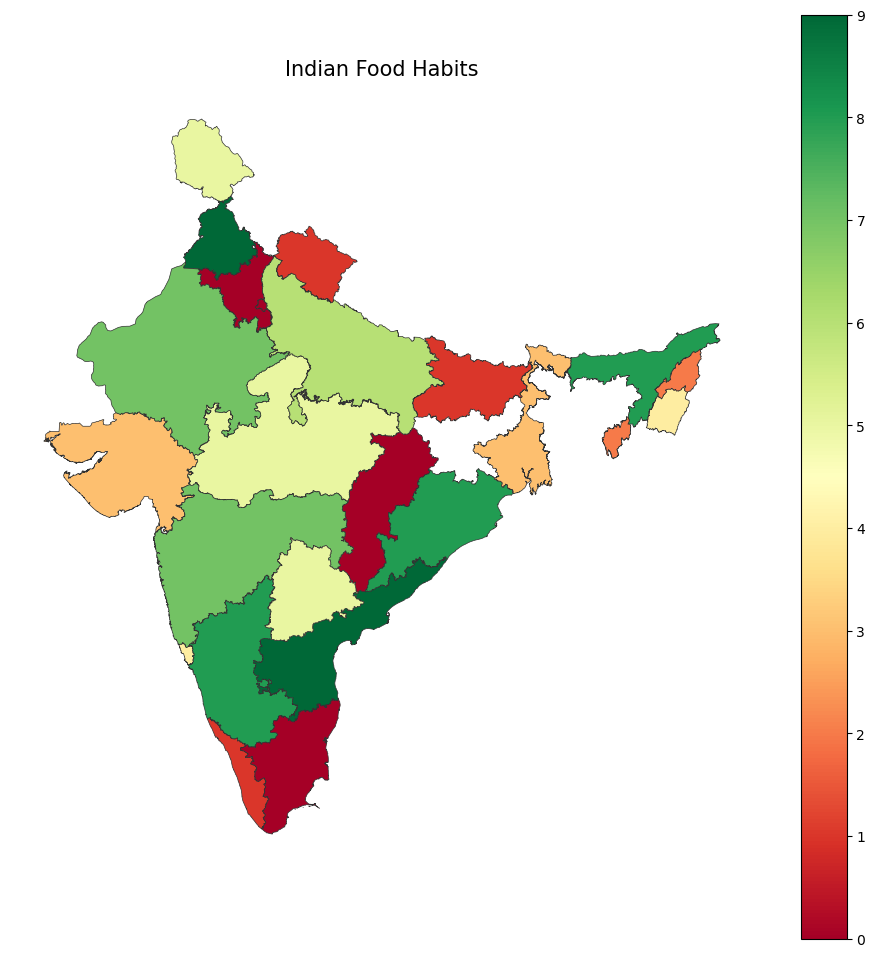

In [65]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Indian Food Habits',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = merged.plot(column='cluster', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

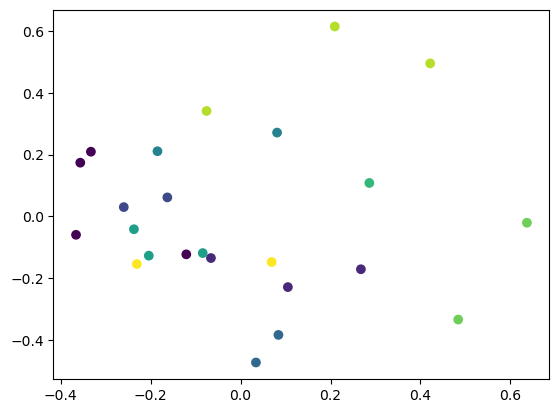

In [66]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca_matrix = pca.fit_transform(vec.toarray())
labels = kmeans.labels_
# Create scatter plot of data points, using cluster labels as color
plt.scatter(pca_matrix[:, 0], pca_matrix[:, 1], c=labels)
plt.show()

Andhra Pradesh belongs to cluster 9
Assam belongs to cluster 8
Bihar belongs to cluster 1
Chhattisgarh belongs to cluster 0
Goa belongs to cluster 4
Gujarat belongs to cluster 3
Haryana belongs to cluster 0
Jammu & Kashmir belongs to cluster 5
Karnataka belongs to cluster 8
Kerala belongs to cluster 1
Madhya Pradesh belongs to cluster 5
Maharashtra belongs to cluster 7
Manipur belongs to cluster 4
NCT of Delhi belongs to cluster 0
Nagaland belongs to cluster 2
Odisha belongs to cluster 8
Punjab belongs to cluster 9
Rajasthan belongs to cluster 7
Tamil Nadu belongs to cluster 0
Telangana belongs to cluster 5
Tripura belongs to cluster 2
Uttar Pradesh belongs to cluster 6
Uttarakhand belongs to cluster 1
West Bengal belongs to cluster 3


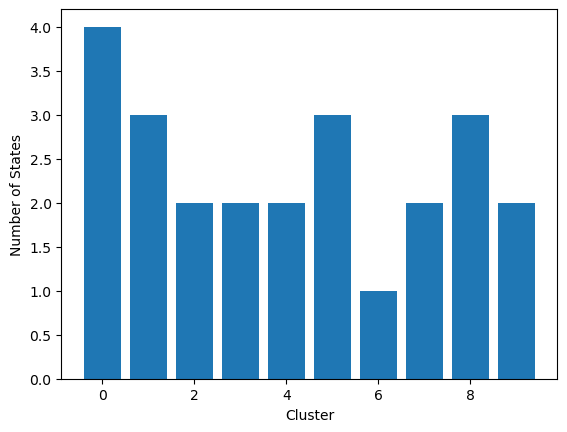

In [67]:
# Print the state and cluster for each row
for idx, row in x.iterrows():
    print(f"{row['state']} belongs to cluster {row['cluster']}")

# Visualize the clustering result using a bar chart
cluster_counts = x.groupby('cluster')['state'].count()
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Number of States')
plt.show()